<a href="https://colab.research.google.com/github/Andyzxm/GEOG_520_open_source_method/blob/main/A13_Xinming_Zhang.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Question 1. Explain how Imaging is used to detect exoplanets

Direct Imaging consists of capturing images of exoplanets directly, which is possible by searching for the light reflected from a planet’s atmosphere at infrared wavelengths. Therefore we can capture the exoplanets from the infraraed wavelength. 

Question 2. Explain how Microlensing is used to detect exoplanets 

Essentially, this method relies on the gravitational force of distant objects to bend and focus light coming from a star. As a planet passes in front of the star relative to the observer, the light dips measurably which can then be used to determine the presence of a planet.

Question 3. Explain how Radial Velocity is used to detect exoplanets

the Radial Velocity Method consists not of looking for signs of planets themselves, but in observing a star for signs of movement. When the light moves towards earth, the spectrum is blue, when it moves away from the earth it is red. Based on this phenomenon, we can look at stars in our universe and detect exoplanets orbiting them.

Question 4. Explain how Transit measurements are used to detect exoplanets

Using the transit method, the luminosity of a star is measured regularly to detect the periodic decrease in luminosity caused by an exoplanet transit. Transits occur when planets pass in front of stars 


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats as st
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
plt.rcParams['figure.figsize'] = [12, 10]

In [ ]:
# Task1 Extract out only rows associated with a single planet as opposed to multiple planets (“Num.Planets”)
planet=pd.read_csv("/content/drive/MyDrive/GEOG520_python_data/datasets/datasets/all_exoplanets_2021.csv")
planet.columns =[column.replace(" ", "_") for column in planet.columns] 
p1=planet.query('Num_Planets == 1')
p1

,No.,Planet_Name,Planet_Host,Num_Stars,Num_Planets,Discovery_Method,Discovery_Year,Discovery_Facility,Orbital_Period_Days,Orbit_Semi-Major_Axis,...,Equilibrium_Temperature,Spectral_Type,Stellar_Effective_Temperature,Stellar_Radius,Stellar_Mass,Stellar_Metallicity,Stellar_Metallicity_Ratio,Stellar_Surface_Gravity,Distance,Gaia_Magnitude
0,1,11 Com b,11 Com,2,1,Radial Velocity,2007,Xinglong Station,326.030000,1.290,...,NaN,G8 III,4742.00,19.00,2.70,-0.350,[Fe/H],2.31,93.1846,4.44038
1,2,11 UMi b,11 UMi,1,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,516.219970,1.530,...,NaN,NaN,4213.00,29.79,2.78,-0.020,[Fe/H],1.93,125.3210,4.56216
2,3,14 And b,14 And,1,1,Radial Velocity,2008,Okayama Astrophysical Observatory,185.840000,0.830,...,NaN,K0 III,4813.00,11.00,2.20,-0.240,[Fe/H],2.63,75.4392,4.91781
4,5,16 Cyg B b,16 Cyg B,3,1,Radial Velocity,1996,Multiple Observatories,798.500000,1.660,...,NaN,NaN,5750.00,1.13,1.08,0.060,[Fe/H],4.36,21.1397,6.06428
5,6,17 Sco b,17 Sco,1,1,Radial Velocity,2020,Lick Observatory,578.380000,1.450,...,NaN,K3 III,4157.00,25.92,1.22,-0.010,[Fe/H],1.70,124.9530,4.75429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4560,4561,omi UMa b,omi UMa,2,1,Radial Velocity,2012,Okayama Astrophysical Observatory,1630.000000,3.900,...,NaN,NaN,5242.00,14.10,3.09,NaN,NaN,NaN,54.9149,3.14432
4562,4563,psi 1 Dra B b,psi 1 Dra B,3,1,Radial Velocity,2015,McDonald Observatory,3117.000000,4.430,...,NaN,G0 V,6212.00,NaN,1.19,0.010,[Fe/H],4.20,22.7188,5.64766
4565,4566,tau Boo b,tau Boo,2,1,Radial Velocity,1996,Lick Observatory,3.312457,0.049,...,NaN,NaN,6466.27,1.43,1.32,0.264,[M/H],4.25,15.6521,4.36617
4570,4571,tau Gem b,tau Gem,1,1,Radial Velocity,2013,Lick Observatory,305.500000,1.170,...,NaN,K2 III,4388.00,26.80,2.30,0.140,[Fe/H],1.96,112.5370,4.03996


In [ ]:
from functools import partialmethod
#Task2 Extract out only records that were detected using one of the following methods (“Discovery.Method”): “Imaging”, “Microlensing”, “Radial Velocity”, “Transit”.
p= p1.query('Discovery_Method == "Imaging"| Discovery_Method=="Microlensing"|Discovery_Method=="Radial Velocity" | Discovery_Method=="Transit"')
p


,No.,Planet_Name,Planet_Host,Num_Stars,Num_Planets,Discovery_Method,Discovery_Year,Discovery_Facility,Orbital_Period_Days,Orbit_Semi-Major_Axis,...,Equilibrium_Temperature,Spectral_Type,Stellar_Effective_Temperature,Stellar_Radius,Stellar_Mass,Stellar_Metallicity,Stellar_Metallicity_Ratio,Stellar_Surface_Gravity,Distance,Gaia_Magnitude
0,1,11 Com b,11 Com,2,1,Radial Velocity,2007,Xinglong Station,326.030000,1.290,...,NaN,G8 III,4742.00,19.00,2.70,-0.350,[Fe/H],2.31,93.1846,4.44038
1,2,11 UMi b,11 UMi,1,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,516.219970,1.530,...,NaN,NaN,4213.00,29.79,2.78,-0.020,[Fe/H],1.93,125.3210,4.56216
2,3,14 And b,14 And,1,1,Radial Velocity,2008,Okayama Astrophysical Observatory,185.840000,0.830,...,NaN,K0 III,4813.00,11.00,2.20,-0.240,[Fe/H],2.63,75.4392,4.91781
4,5,16 Cyg B b,16 Cyg B,3,1,Radial Velocity,1996,Multiple Observatories,798.500000,1.660,...,NaN,NaN,5750.00,1.13,1.08,0.060,[Fe/H],4.36,21.1397,6.06428
5,6,17 Sco b,17 Sco,1,1,Radial Velocity,2020,Lick Observatory,578.380000,1.450,...,NaN,K3 III,4157.00,25.92,1.22,-0.010,[Fe/H],1.70,124.9530,4.75429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4560,4561,omi UMa b,omi UMa,2,1,Radial Velocity,2012,Okayama Astrophysical Observatory,1630.000000,3.900,...,NaN,NaN,5242.00,14.10,3.09,NaN,NaN,NaN,54.9149,3.14432
4562,4563,psi 1 Dra B b,psi 1 Dra B,3,1,Radial Velocity,2015,McDonald Observatory,3117.000000,4.430,...,NaN,G0 V,6212.00,NaN,1.19,0.010,[Fe/H],4.20,22.7188,5.64766
4565,4566,tau Boo b,tau Boo,2,1,Radial Velocity,1996,Lick Observatory,3.312457,0.049,...,NaN,NaN,6466.27,1.43,1.32,0.264,[M/H],4.25,15.6521,4.36617
4570,4571,tau Gem b,tau Gem,1,1,Radial Velocity,2013,Lick Observatory,305.500000,1.170,...,NaN,K2 III,4388.00,26.80,2.30,0.140,[Fe/H],1.96,112.5370,4.03996


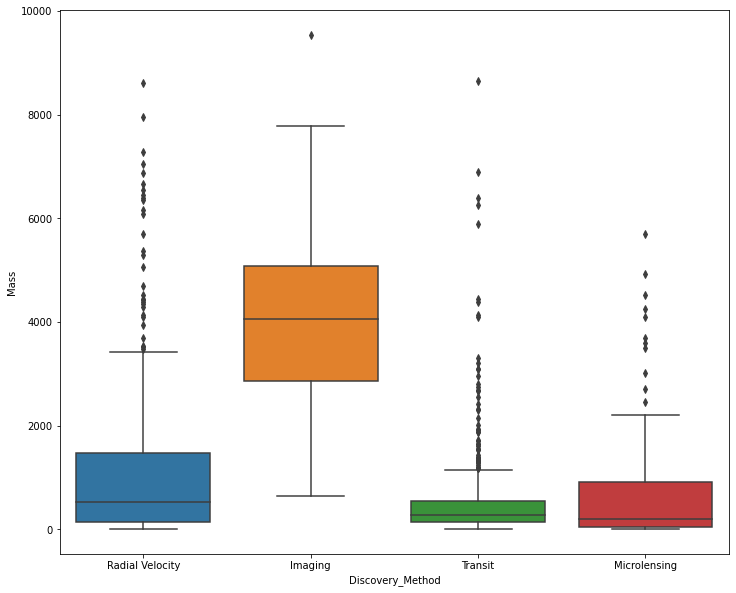

In [ ]:
#Task3 Create a grouped boxplot showing the distribution of the estimated mass (“Mass”) of the planets detected using each of the four methods. 
#On this scale, the Earth has a mass of 1. Does it appear that certain methods are better at detecting smaller planets than others? 
fig, axs = plt.subplots(1, 1)
sns.boxplot(x= "Discovery_Method", y= "Mass", data=p)


From the generated graohy we can tell that The transit method is the better method at detecting smaller exoplanets

Text(0, 0.5, 'Estimated mass')

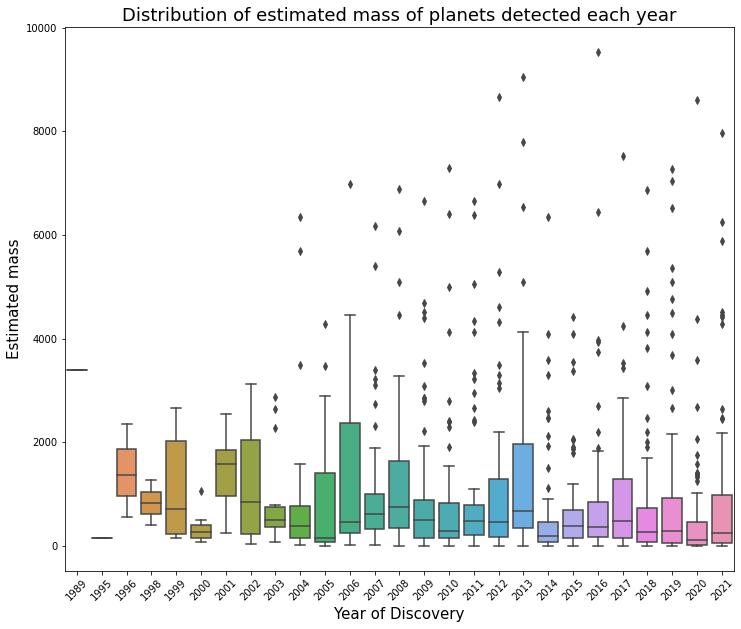

In [ ]:
#Task4 Create a grouped boxplot showing the distribution of the estimated mass (“Mass”) of the planets detected each year. 
#Does it appear that the average sizes or masses of the planets being detected have changed over time?
fig1, axs = plt.subplots(1, 1)
sns.boxplot(x= "Discovery_Year", y= "Mass", data=p1)
axs.set_title("Distribution of estimated mass of planets detected each year", fontsize = 18)
axs.set_xlabel("Year of Discovery", fontsize = 15)
axs.tick_params(axis = 'x', labelrotation = 45)
axs.set_ylabel("Estimated mass", fontsize = 15)


There is a trend towards a more consistent estimation of mass over time. There was a lot of fluctuation before 2008, but since 2009 it has become more accurate.

Text(0, 0.5, 'Estimated mass')

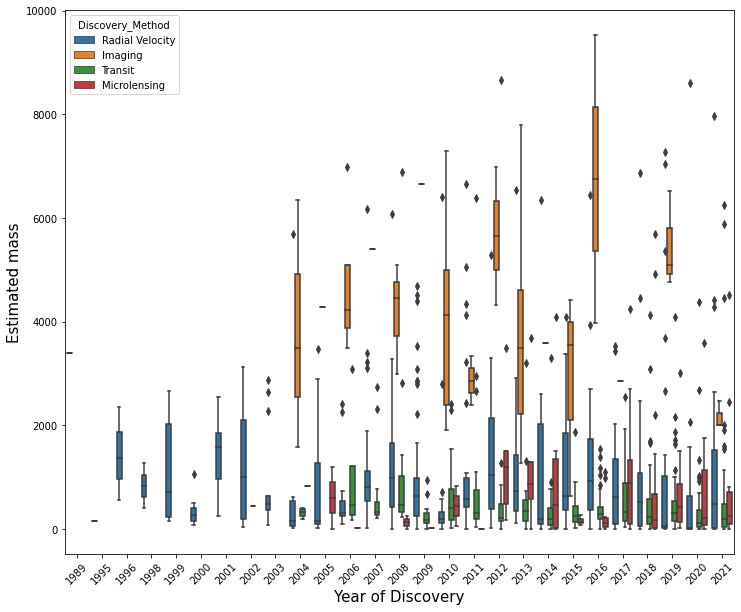

In [ ]:
#Task5 Create a grouped boxplot showing the distribution of the estimated mass(“Mass”) of the planets detected each year with the four types broken into separate boxplots per year. 
#Does it appear that the sizes or masses of the planets being detected have changed over time? Is a trend more obvious when the detection methods are differentiated?

fig2, axs = plt.subplots(1, 1)
sns.boxplot(x= "Discovery_Year", y= "Mass",hue="Discovery_Method" ,data=p)
axs.set_xlabel("Year of Discovery", fontsize = 15)
axs.tick_params(axis = 'x', labelrotation = 45)
axs.set_ylabel("Estimated mass", fontsize = 15)


According from this output graph, we can tell that there's an slightly upward trend as time countinues for imaging method, but drops beack for smaller masses in 2021, it also includes a lot of diffeferent range of planet. The Radial Velocity methods have existed the longest and display relatively consistent mass estimates that does not change too much over time. The transit method and microlensing method have been mostly detecing smaller masses planet and has low range of varaity in their detections. 

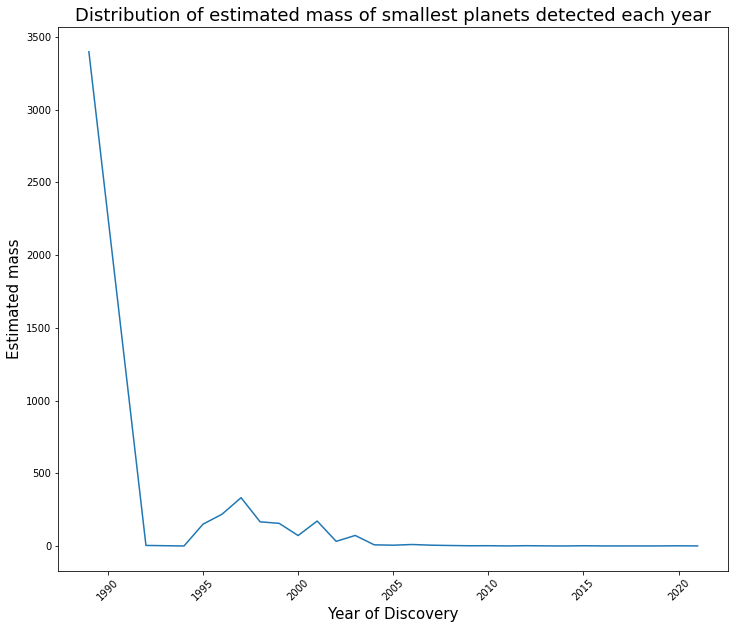

In [ ]:
#Task6 Create a line graph showing the estimated mass of the least massive planet detected each year. (group by year)
#Discuss the trend observed. Note that there are some missing values.
smal = pd.DataFrame(planet.groupby("Discovery_Year")["Mass"].min())
line_plot, axs = plt.subplots(1,1)
sns.lineplot(ax = axs, x = "Discovery_Year", y = "Mass", data = smal)
axs.set_title("Distribution of estimated mass of smallest planets detected each year", fontsize = 18)
axs.set_xlabel("Year of Discovery", fontsize = 15)
axs.tick_params(axis = 'x', labelrotation = 45)
axs.set_ylabel("Estimated mass", fontsize = 15)
plt.show(line_plot)

From this generated graph we can oberve the obvious negative trend dropping from 1990 to 1993. we can tell there was a significant decrease in the estimated mass of the smallest planet from from 1990 till about 1993. according from our previous box plots we estiamte that trend was happening due to the lack of methods variaty and only used radial velocity method. Later on with more methods we can see a slight increase in masses. after 2005, it seems like either we can't detect anymore with current tech or we have detected all the small mass planets. 

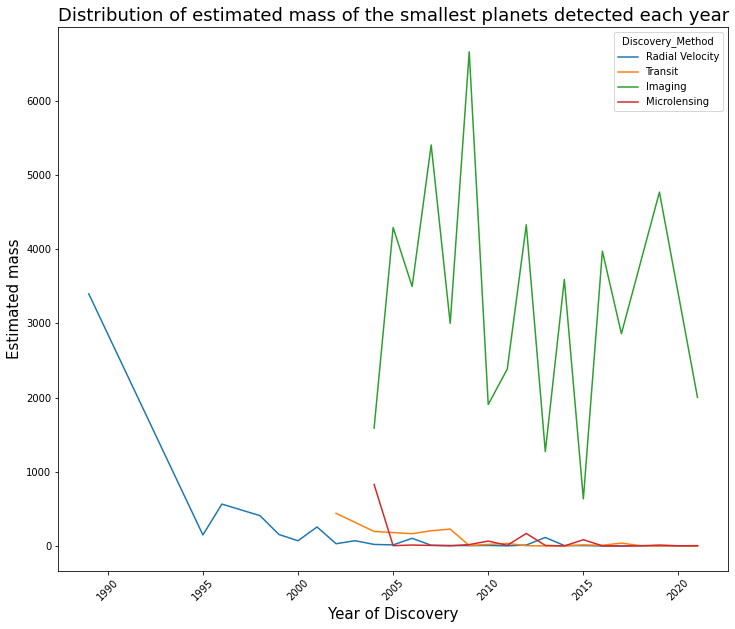

In [ ]:
#Task7 Create a line graph showing the estimated mass of the least massive planet detected each year with separate lines for each of the four detection methods.
#Discuss the trend observed. Note that there are some missing values.
smal2 = pd.DataFrame(p.groupby(['Discovery_Year', 'Discovery_Method'])["Mass"].min())
line_plot, axs = plt.subplots(1,1)
sns.lineplot(ax = axs, x = "Discovery_Year", y = "Mass", hue = "Discovery_Method", data = smal2)
axs.set_title("Distribution of estimated mass of the smallest planets detected each year", fontsize = 18)
axs.set_xlabel("Year of Discovery", fontsize = 15)
axs.tick_params(axis = 'x', labelrotation = 45)
axs.set_ylabel("Estimated mass", fontsize = 15)
plt.show(line_plot)


From this graph we can observe that radial velocity method has an overall downward trend and remain quite consistant after year 2005. Both The transit method and microlensing shows a steady decrease in estimated mass until transit method's detection reached 0 around 2008. Microlensing displays a similar trend, except there are a few small increases in a few years around 2013 and 2015. The method with most fluctuation is the imaging method that increase and decrease as time continues.   

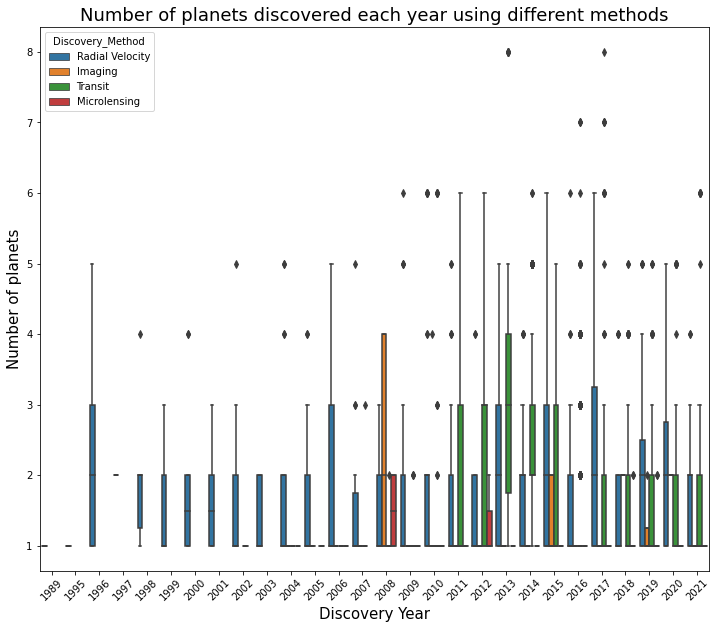

In [ ]:
#Task8 Create a grouped bar graph showing the count of planets detected using each of the four methods per year. Discuss the trends observed.
p2 = planet.query('Discovery_Method == "Imaging" | Discovery_Method == "Microlensing" | Discovery_Method == "Radial Velocity" | Discovery_Method == "Transit"')

box_plot, axs = plt.subplots(1,1)
sns.boxplot(ax = axs, x = "Discovery_Year", y = "Num_Planets", hue = "Discovery_Method", data = p2)
axs.set_title("Number of planets discovered each year using different methods", fontsize = 18)
axs.set_xlabel("Discovery Year", fontsize = 15)
axs.tick_params(axis = 'x', labelrotation = 45)
axs.set_ylabel("Number of planets", fontsize = 15)
plt.show(box_plot)



From this boxplor we can estiamte that radial velocity method has been really consistant and has been detecing 2 to 3 planets each year since the beginning of the application. Microlensing has the least number of total planet detected. From a time series perspective, imaging method has detected the most during 2008 but the transit method has been really good at detecing after year 2011 and has been quite consistant with 2 or 3 detection annualy. 